Sales Forecasting 
## 1. time seires visualization

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
data_path = "/content/drive/MyDrive/github_repo/time-series-study/data"

In [3]:
train = pd.read_csv(os.path.join(data_path, "train.csv"))
oil = pd.read_csv(os.path.join(data_path, "oil.csv"))
store = pd.read_csv(os.path.join(data_path, "stores.csv"))
holiday = pd.read_csv(os.path.join(data_path, "holidays_events.csv"))
trsc = pd.read_csv(os.path.join(data_path, "transactions.csv"))
test = pd.read_csv(os.path.join(data_path, "test.csv"))

- store_nbr(54) 별로 상품(family) 33개씩 총 1782개 time series 존재
- period(seq_length)
  - train: 1684 (20130101~20170815)
  - test: 16 (20170816~20170831)

In [4]:
train.head(3)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


In [5]:
train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [38]:
store_sales = \
  train[["store_nbr", "sales"]].groupby("store_nbr")\
                              .agg({"sales":["mean", "median"]})\
                              .sort_values(by=('sales', 'median'), ascending=False)
store_sales_top10_id = store_sales.index[:10]
store_sales.head()

sales       
                  mean median
store_nbr                    
44         1117.245254   75.0
3           908.405495   64.0
45          980.673908   62.0
47          916.798209   51.0
49          781.330450   48.0

In [6]:
def plot_ts(df:pd.DataFrame, category:str, store_no:int, fig_size=(20,8)):
  df = df[(df.family==category) & (df.store_nbr==store_no)]
  plt.figure(figsize=fig_size)
  plt.plot(df.date, df.sales)
  plt.plot(df.date, df.onpromotion)
  return df

def plot_by_stores(df:pd.DataFrame, category:str, store_id:list):
  df = df.loc[(df.family==category),][["date", "store_nbr", "sales"]]
  df = pd.pivot(df, index=["date"], columns = "store_nbr", values = "sales")
  fig = px.area(df.iloc[:, store_id], facet_col="store_nbr", facet_col_wrap=2)
  fig.show()
  return

def plot_by_family(df:pd.DataFrame, store_id:int, categories:list=[]):
  if len(categories) == 0:
    df = df.loc[df.store_nbr==store_id, ][["date", "family", "sales"]]
  else:
    df = df.loc[(df.store_nbr==store_id) & (df.family.isin(categories)), ][["date", "family", "sales"]]
  df = pd.pivot(df, index=["date"], columns = "family", values = "sales").reset_index()

  fig = px.line(df, x="date", y=df.columns,
                hover_data={"date": "|%B %d, %Y"},
                title='custom tick labels')
  fig.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y")
  fig.show()
  return

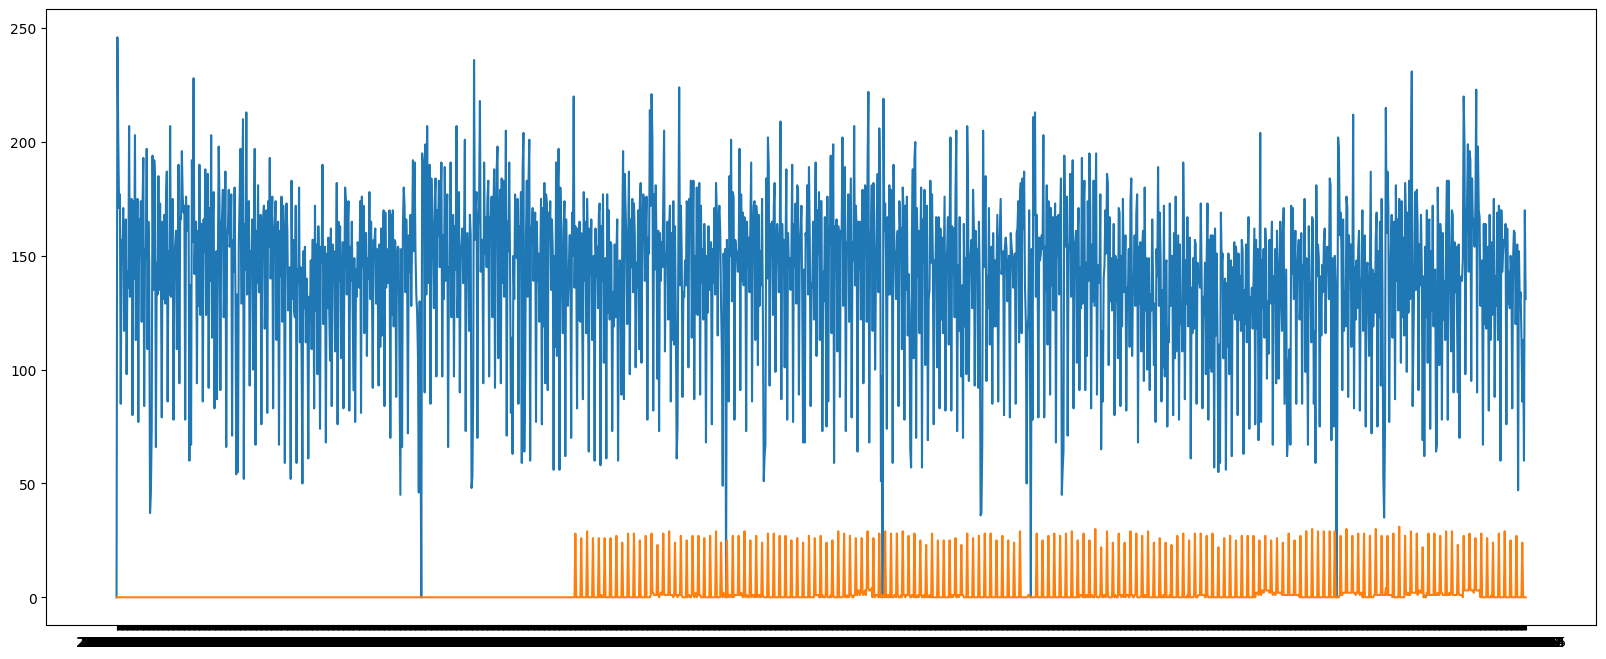

In [7]:
df = plot_ts(train, 'EGGS', 1)

In [70]:
plot_by_stores(train, "EGGS", store_sales_top10_id)

In [74]:
plot_by_family(train, 44)

In [77]:
plot_by_family(train, 44, ["EGGS", "PRODUCE", "AUTOMOTIVE", "BEVERAGES", "FROZEN FOODS", "GROCERY I"])